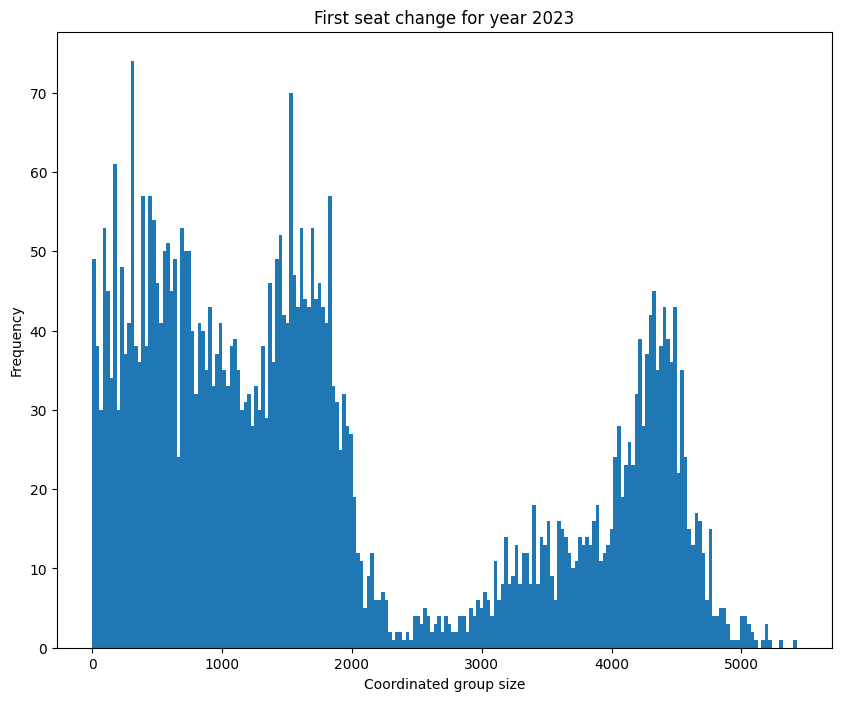

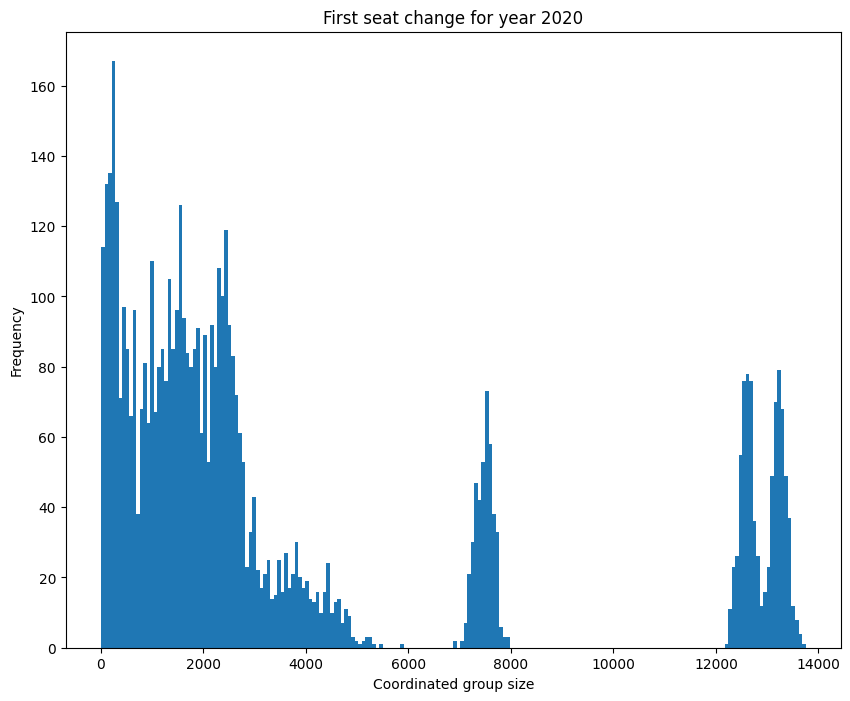

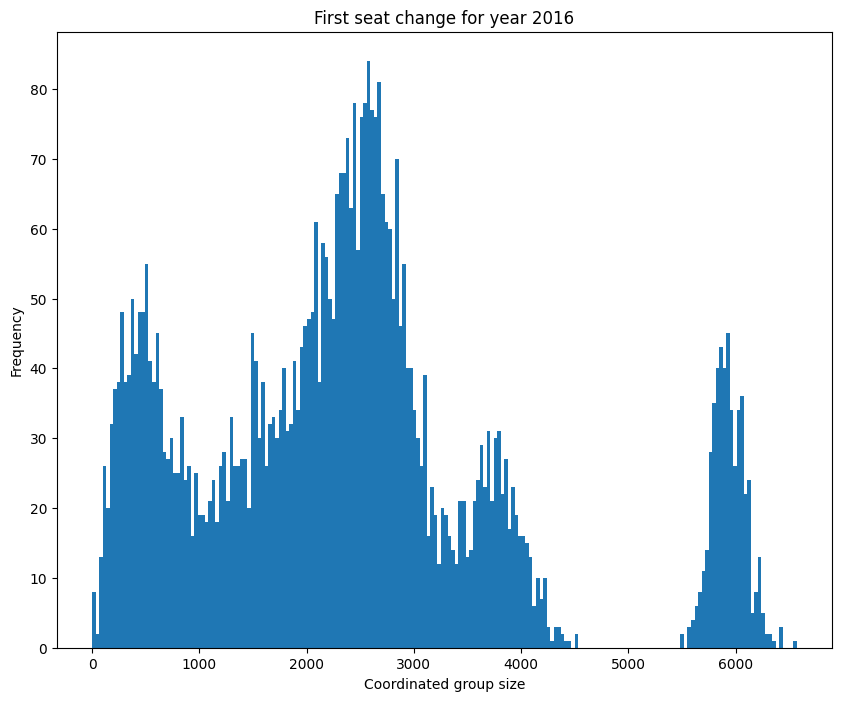

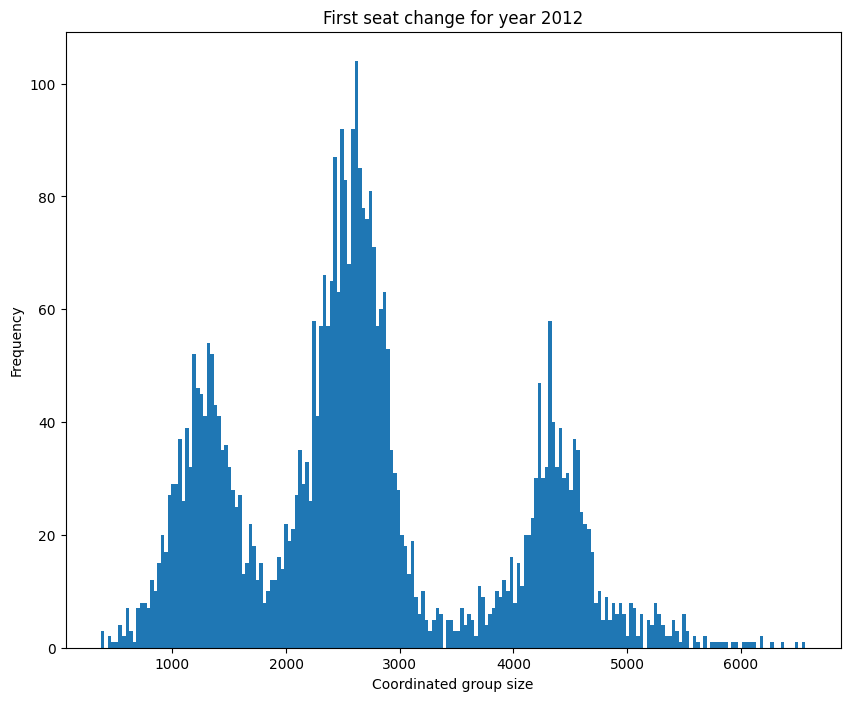

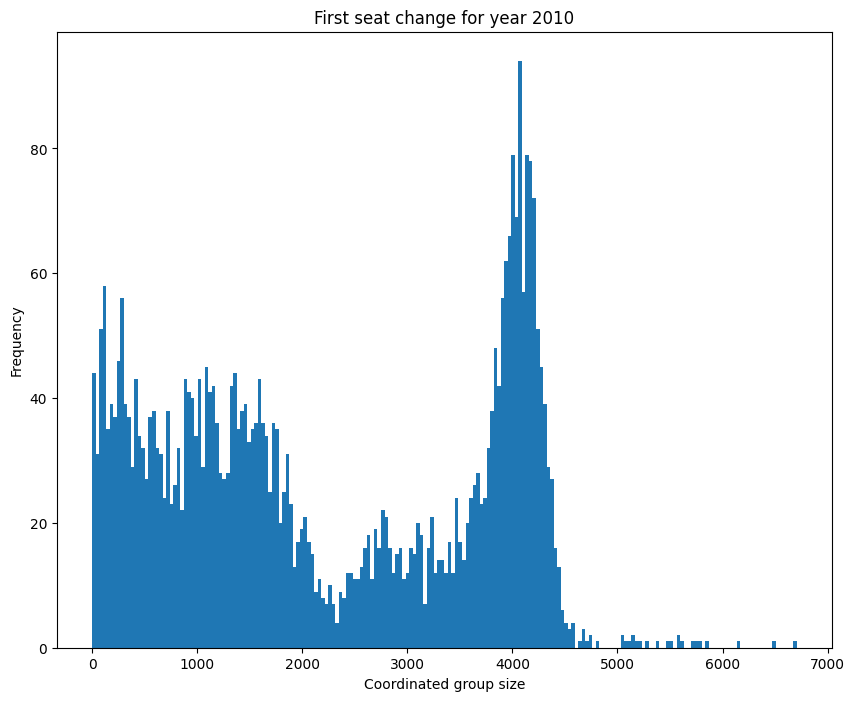

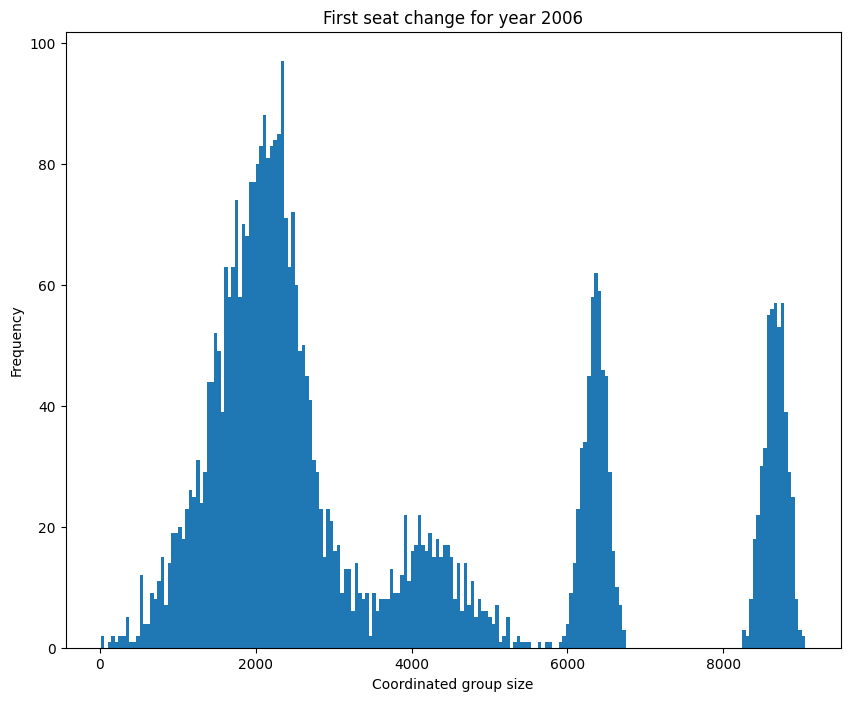

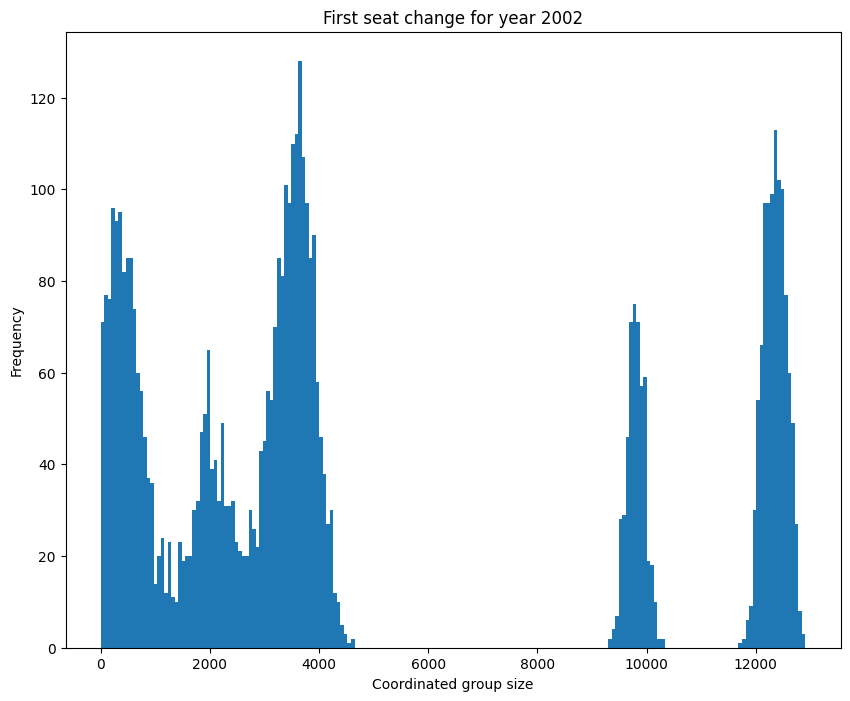

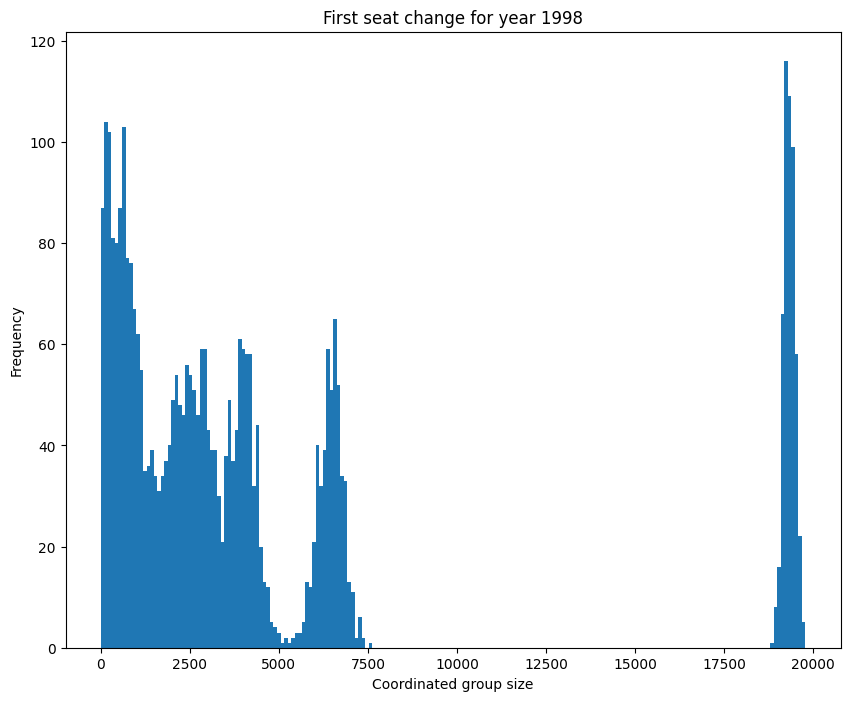

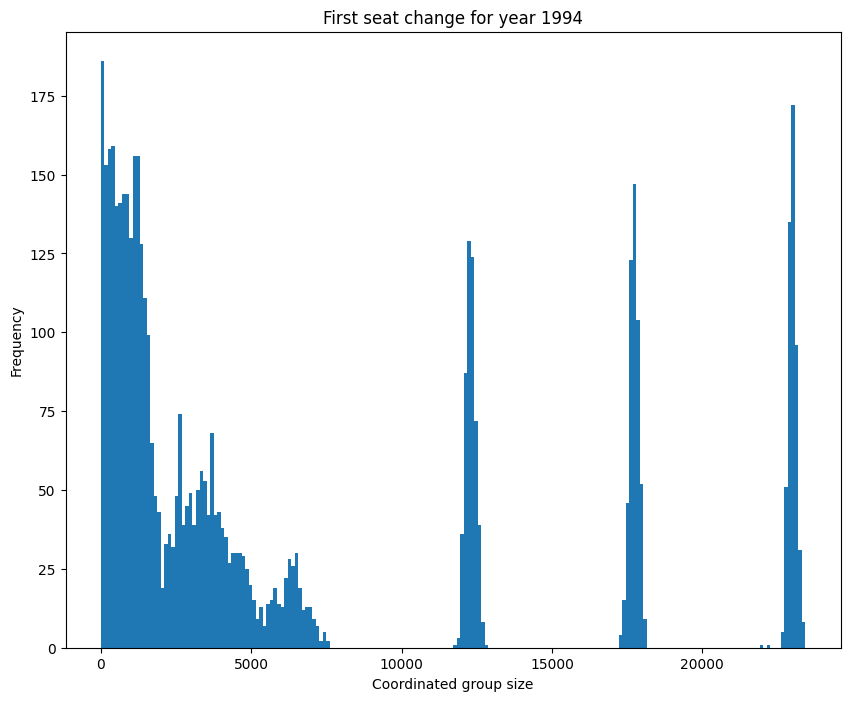

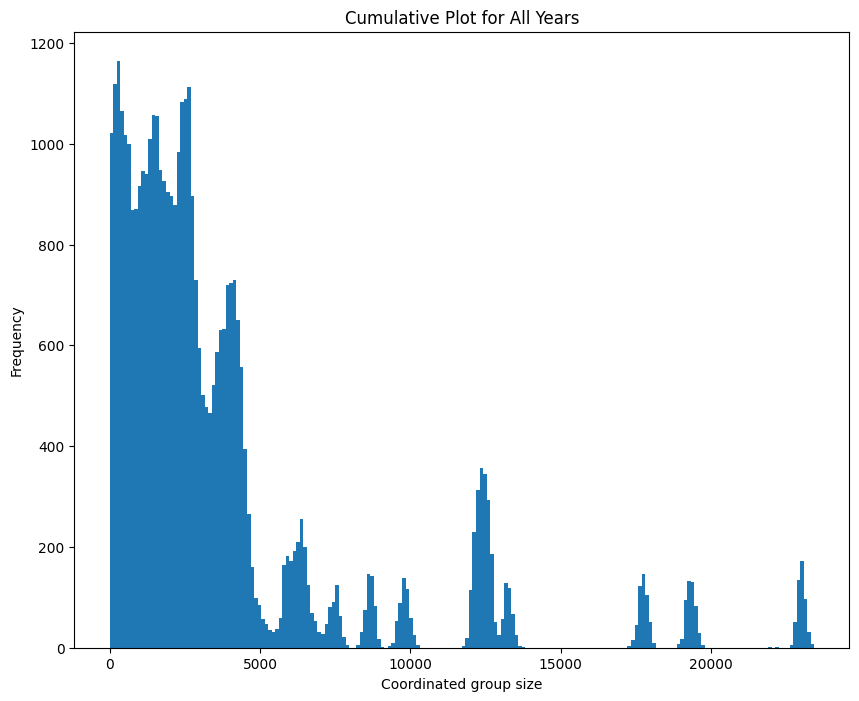

Average Standard Deviation: 3409.16890851159


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of years to generate plots for
years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

# Create a new figure for cumulative plot
cumulative_data = []

# Loop through each year and create a separate figure
std_devs = []  # To store standard deviations for each year

for year in years:
    # Create a new figure for individual plots
    plt.figure(figsize=(10, 8))
    
    # Read the CSV data for the given year
    df = pd.read_csv(f'./lowest_samples/lowest_samples{year}.csv', header=0)
    
    # Store the third column in the cumulative_data
    cumulative_data.extend(df.iloc[:, 2])
    
    # Calculate the standard deviation and add to the list
    std_dev = np.std(df.iloc[:, 2])
    std_devs.append(std_dev)
    
    # Plot the histogram of the third column
    plt.hist(df.iloc[:, 2], bins=200)
    
    # Set the x and y labels and the title
    plt.xlabel('Coordinated group size')
    plt.ylabel('Frequency')
    plt.title(f'First seat change for year {year}')
    
    # Display the plot
    plt.show()

# Create a new figure for the cumulative plot
plt.figure(figsize=(10, 8))

# Plot the histogram for cumulative data
plt.hist(cumulative_data, bins=200)
plt.xlabel('Coordinated group size')
plt.ylabel('Frequency')
plt.title('Cumulative Plot for All Years')
plt.show()

# Calculate the average standard deviation
avg_std_dev = np.mean(std_devs)
print("Average Standard Deviation:", avg_std_dev)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

years = ["2023", "2020", "2016", "2012", "2010", "2006", "2002", "1998", "1994"]

# Define a function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean, std_err = np.mean(data), stats.sem(data)
    margin_err = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, margin_err

for year in years:
    df = pd.read_csv(f'lowest_samples{year}.csv', header=0)

    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df.iloc[:, 2])
    plt.xlabel('Third Column')
    plt.title(f'Boxplot of the {year}')
    plt.show()

    # Calculate average, confidence interval, and dispersion
    avg = np.mean(df.iloc[:, 2])
    conf_interval = confidence_interval(df.iloc[:, 2])
    dispersion = np.var(df.iloc[:, 2])

    print(f'Year: {year}')
    print(f'Average: {avg}')
    print(f'Confidence Interval (95%): {conf_interval[0]} ± {conf_interval[1]}')
    print(f'Dispersion (Variance): {dispersion}')
    print('---------------------------------------')


FileNotFoundError: [Errno 2] No such file or directory: 'lowest_samples2023.csv'

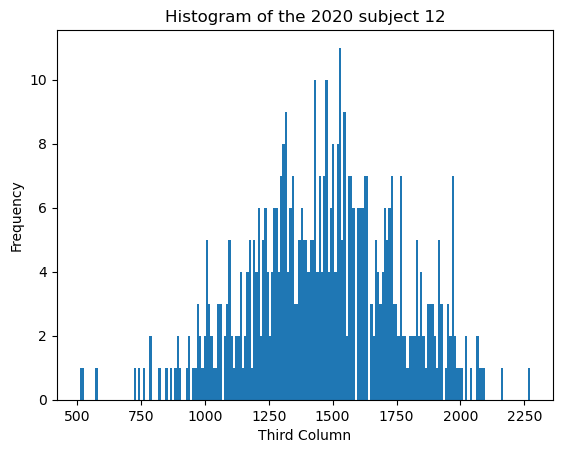

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f'lowest_samples2020-p12.csv', header=0)

plt.hist(df.iloc[:, 2], bins=200)
plt.xlabel('Third Column')
plt.ylabel('Frequency')
plt.title(f'Histogram of the 2020 subject 12')
plt.show()


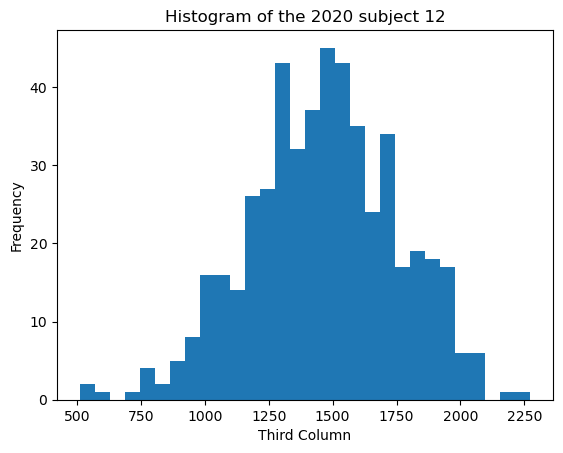

Kolmogorov-Smirnov Test Statistic: 1.0
P-value: 0.0
Average: 1466.236
Dispersion: 290.90007271226295
Confidence Interval (95%): [1440.7374843800255, 1491.7345156199747]
Kolmogorov-Smirnov Test Statistic: 1.0
P-value: 0.0


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

# Load the data
df = pd.read_csv('lowest_samples2020-p12.csv')

# Extract the third column
data = df.iloc[:, 2]

# Plot histogram
plt.hist(data, bins=30)
plt.xlabel('Third Column')
plt.ylabel('Frequency')
plt.title('Histogram of the 2020 subject 12')
plt.show()

# Perform Kolmogorov-Smirnov test for normality
ks_statistic, p_value = kstest(data, 'norm')


# Calculate average and dispersion
average = np.mean(data)
dispersion = np.std(data)

# Calculate confidence intervals
confidence_interval_lower = average - 1.96 * (dispersion / np.sqrt(len(data)))
confidence_interval_upper = average + 1.96 * (dispersion / np.sqrt(len(data)))

# Print results
print(f'Kolmogorov-Smirnov Test Statistic: {ks_statistic}')
print(f'P-value: {p_value}')
print(f'Average: {average}')
print(f'Dispersion: {dispersion}')
print(f'Confidence Interval (95%): [{confidence_interval_lower}, {confidence_interval_upper}]')

# Perform Kolmogorov-Smirnov test for logistic distribution
ks_statistic, p_value = kstest(data, 'laplace')

# Print results
print(f'Kolmogorov-Smirnov Test Statistic: {ks_statistic}')
print(f'P-value: {p_value}')


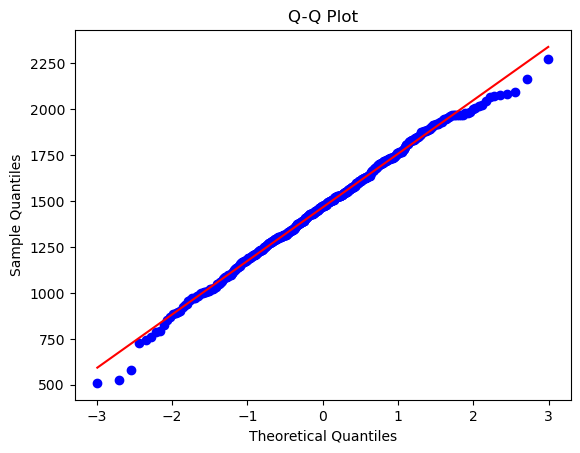

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df = pd.read_csv('lowest_samples2020-p12.csv')

# Extract the third column
data = df.iloc[:, 2]

# Create Q-Q plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


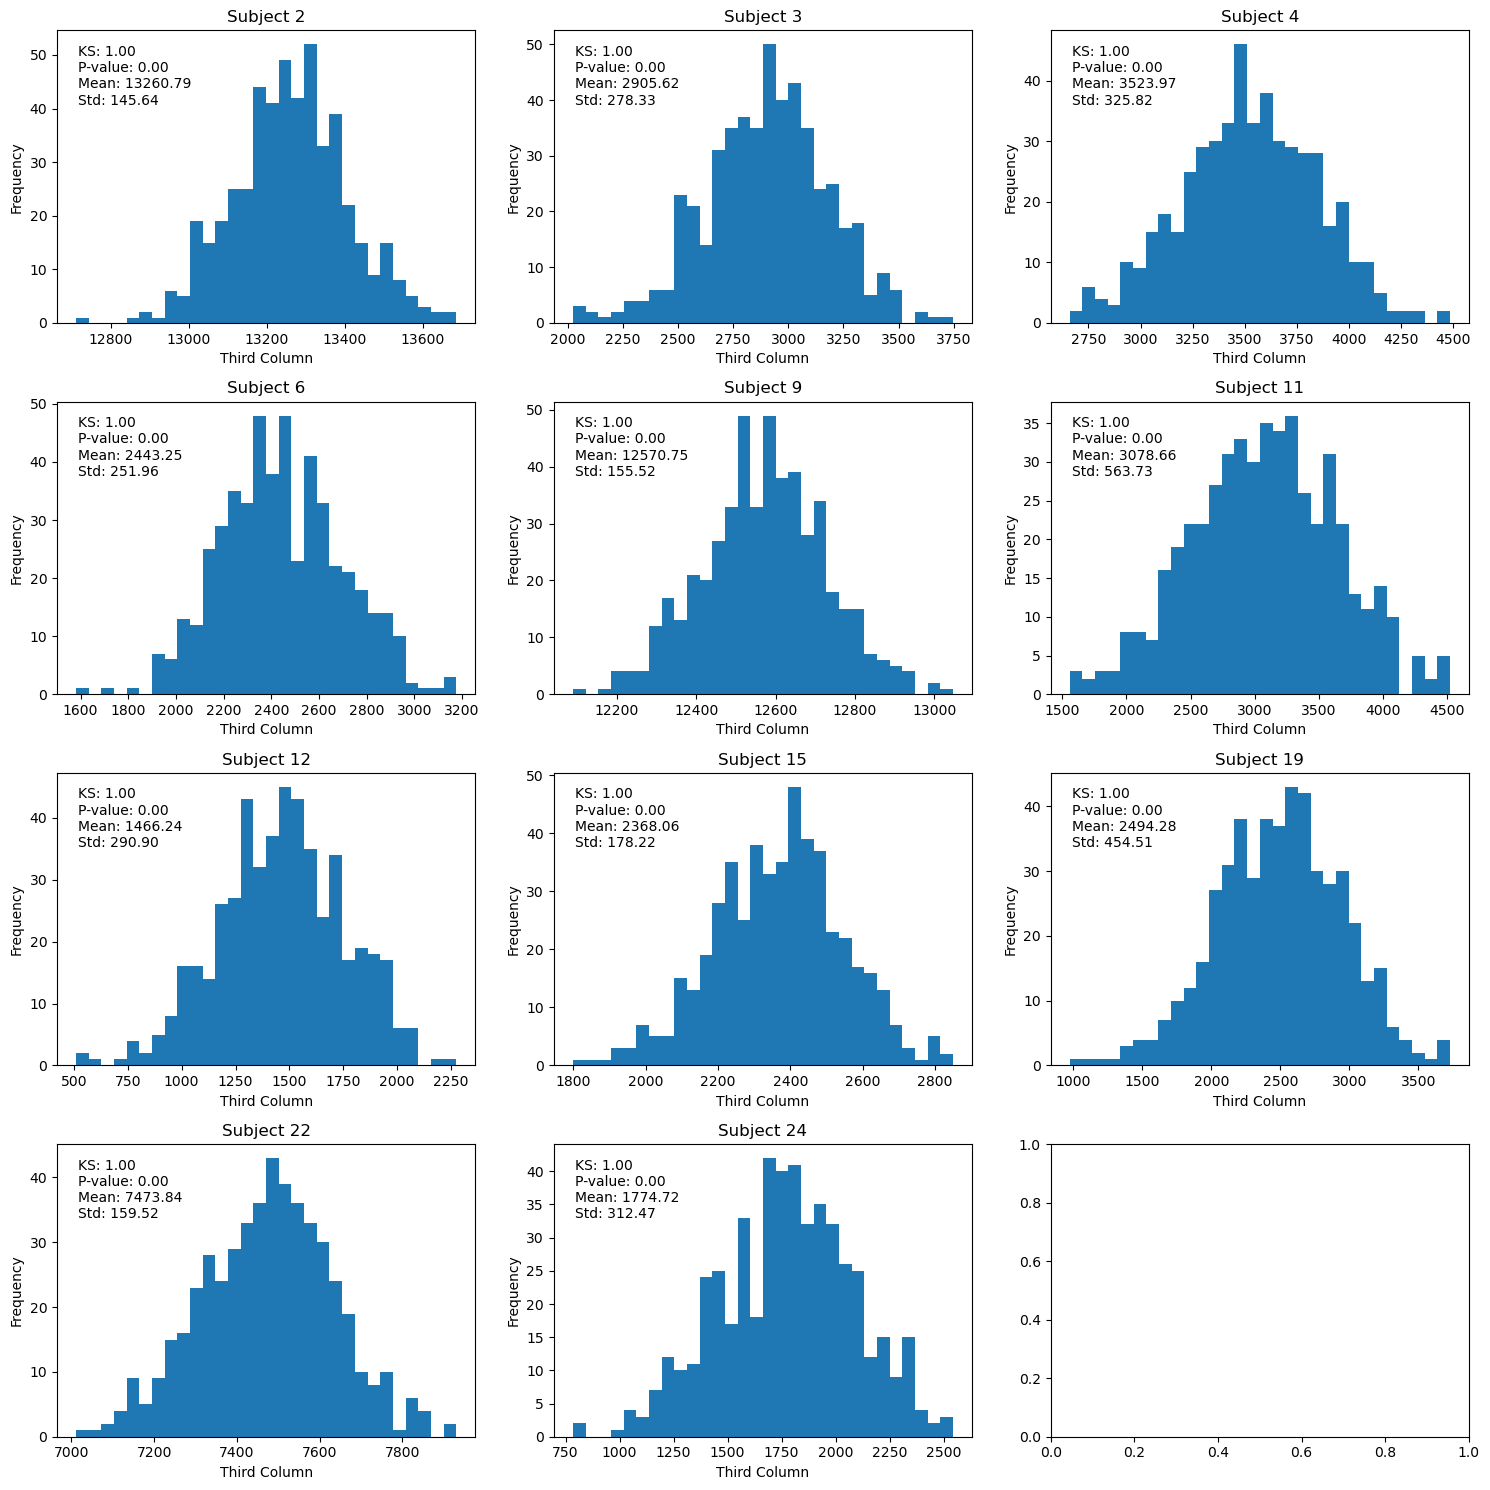

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

# Create a figure and axis object for subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for subject, ax in zip(set(x if x not in (1, 5, 7, 8, 10, 13, 14, 16, 17, 18, 20, 21, 23, 25) else 12 for x in range(1, 26)), axs.flatten()):
    df = pd.read_csv(f'lowest_samples2020-p{subject}.csv')

    data = df.iloc[:, 2]

    ax.hist(data, bins=30)
    ax.set_xlabel('Third Column')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Subject {subject}')

    ks_statistic, p_value = kstest(data, 'norm')

    average = np.mean(data)
    dispersion = np.std(data)

    confidence_interval_lower = average - 1.96 * (dispersion / np.sqrt(len(data)))
    confidence_interval_upper = average + 1.96 * (dispersion / np.sqrt(len(data)))

    ax.text(0.05, 0.95, f'KS: {ks_statistic:.2f}\nP-value: {p_value:.2f}\nMean: {average:.2f}\nStd: {dispersion:.2f}', transform=ax.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()
